# Domain analasis:
This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.The names and id numbers of the patients were recently removed from the database.

# Importing the libraries and load the data

In [1]:
## importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("dataset_35_dermatology (1).csv")   ## Domain Analysis
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


# Application_train

In [3]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35,1


### Attribute Information:
Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
1: erythema
2: scaling
3: definite borders
4: itching
5: koebner phenomenon
6: polygonal papules
7: follicular papules
8: oral mucosal involvement
9: knee and elbow involvement
10: scalp involvement
11: family history, (0 or 1)
    Histopathological Attributes: (take values 0, 1, 2, 3)
12: melanin incontinence
13: eosinophils in the infiltrate
14: PNL infiltrate
15: fibrosis of the papillary dermis
16: exocytosis
17: acanthosis
18: hyperkeratosis
19: parakeratosis
20: clubbing of the rete ridges
21: elongation of the rete ridges
22: thinning of the suprapapillary epidermis
23: spongiform pustule
24: munro microabcess
25: focal hypergranulosis
26: disappearance of the granular layer
27: vacuolisation and damage of basal layer
28: spongiosis
29: saw-tooth appearance of retes
30: follicular horn plug
31: perifollicular parakeratosis
32: inflammatory monoluclear inflitrate
33: band-like infiltrate
34: Age (linear)

In [5]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [7]:
data.shape

(366, 35)

In [8]:
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

## EDA (Exploratory Data Analysis)

In [9]:
## Univariate Analysis
!pip install sweetviz#installing sweetviz library

ERROR: Invalid requirement: 'sweetviz#installing'


In [10]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

 By using the data.isnull().sum() function, we can confirm that there are no null values present in the dataset. However, upon further inspection, we observed that there are some rows in the dataset where the age column is denoted as "?". To address this issue, we will remove the rows containing the "?" value in the age column from the dataset. This step ensures that the data remains accurate and reliable for subsequent analysis.

In [12]:
age_values_with_question_mark = data[data['Age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [13]:
data['Age'] = data['Age'].replace('?', np.nan)  # Replace '?' with NaN
# we remove rows with NaN values in the 'Age' column using dropna() function
data.dropna(subset=['Age'], inplace=True)

In [14]:
age_values_with_question_mark = data[data['Age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class


In [15]:
data['class'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

In [16]:
data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_and_elbow_involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

The 'Age' column in the dataset is currently of object type. In order to utilize the Age as an input feature in our analysis, we need to convert it to an integer type. By doing so, we ensure that the Age values are represented numerically and can be used effectively in our models and calculations.

In [17]:
data['Age'] = data['Age'].astype(float).astype(pd.Int64Dtype())  # Convert to float and then to integer

In [18]:
data.dtypes

erythema                                    int64
scaling                                     int64
definite_borders                            int64
itching                                     int64
koebner_phenomenon                          int64
polygonal_papules                           int64
follicular_papules                          int64
oral_mucosal_involvement                    int64
knee_and_elbow_involvement                  int64
scalp_involvement                           int64
family_history                              int64
melanin_incontinence                        int64
eosinophils_in_the_infiltrate               int64
PNL_infiltrate                              int64
fibrosis_of_the_papillary_dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing_of_the_rete_ridges                 int64


 Data visualization enhances our understanding of the dataset, making it easier to convey findings and key messages to stakeholders and decision-makers. Through effective visualizations, we can highlight important correlations, enabling better-informed decision-making and actionable insights.

### Data Visualization

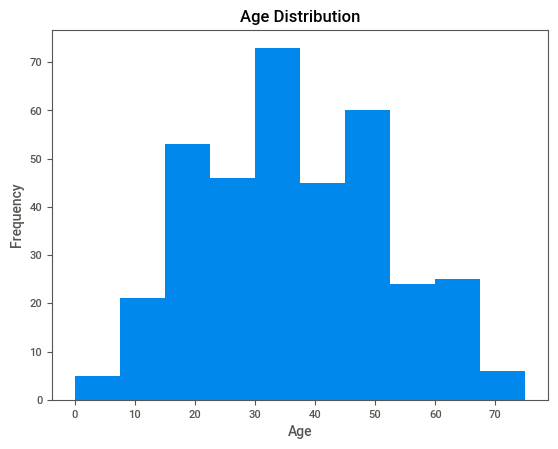

In [19]:
# Visualize the distribution of classes
# Plot a histogram of the 'Age' column
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

The histogram allows us to visualize the distribution of a numerical variable, such as the 'Age' column in your DataFrame. By plotting a histogram, we can understand the frequency and range of ages present in our dataset. This can help identify patterns or anomalies in the Age distribution, such as whether it is skewed, normally distributed, or has any significant peaks or gaps.

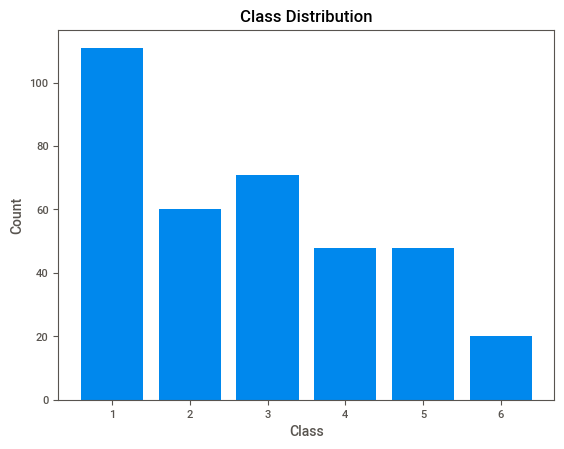

In [20]:
# Plot a bar plot of the 'class' column
class_counts = data['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

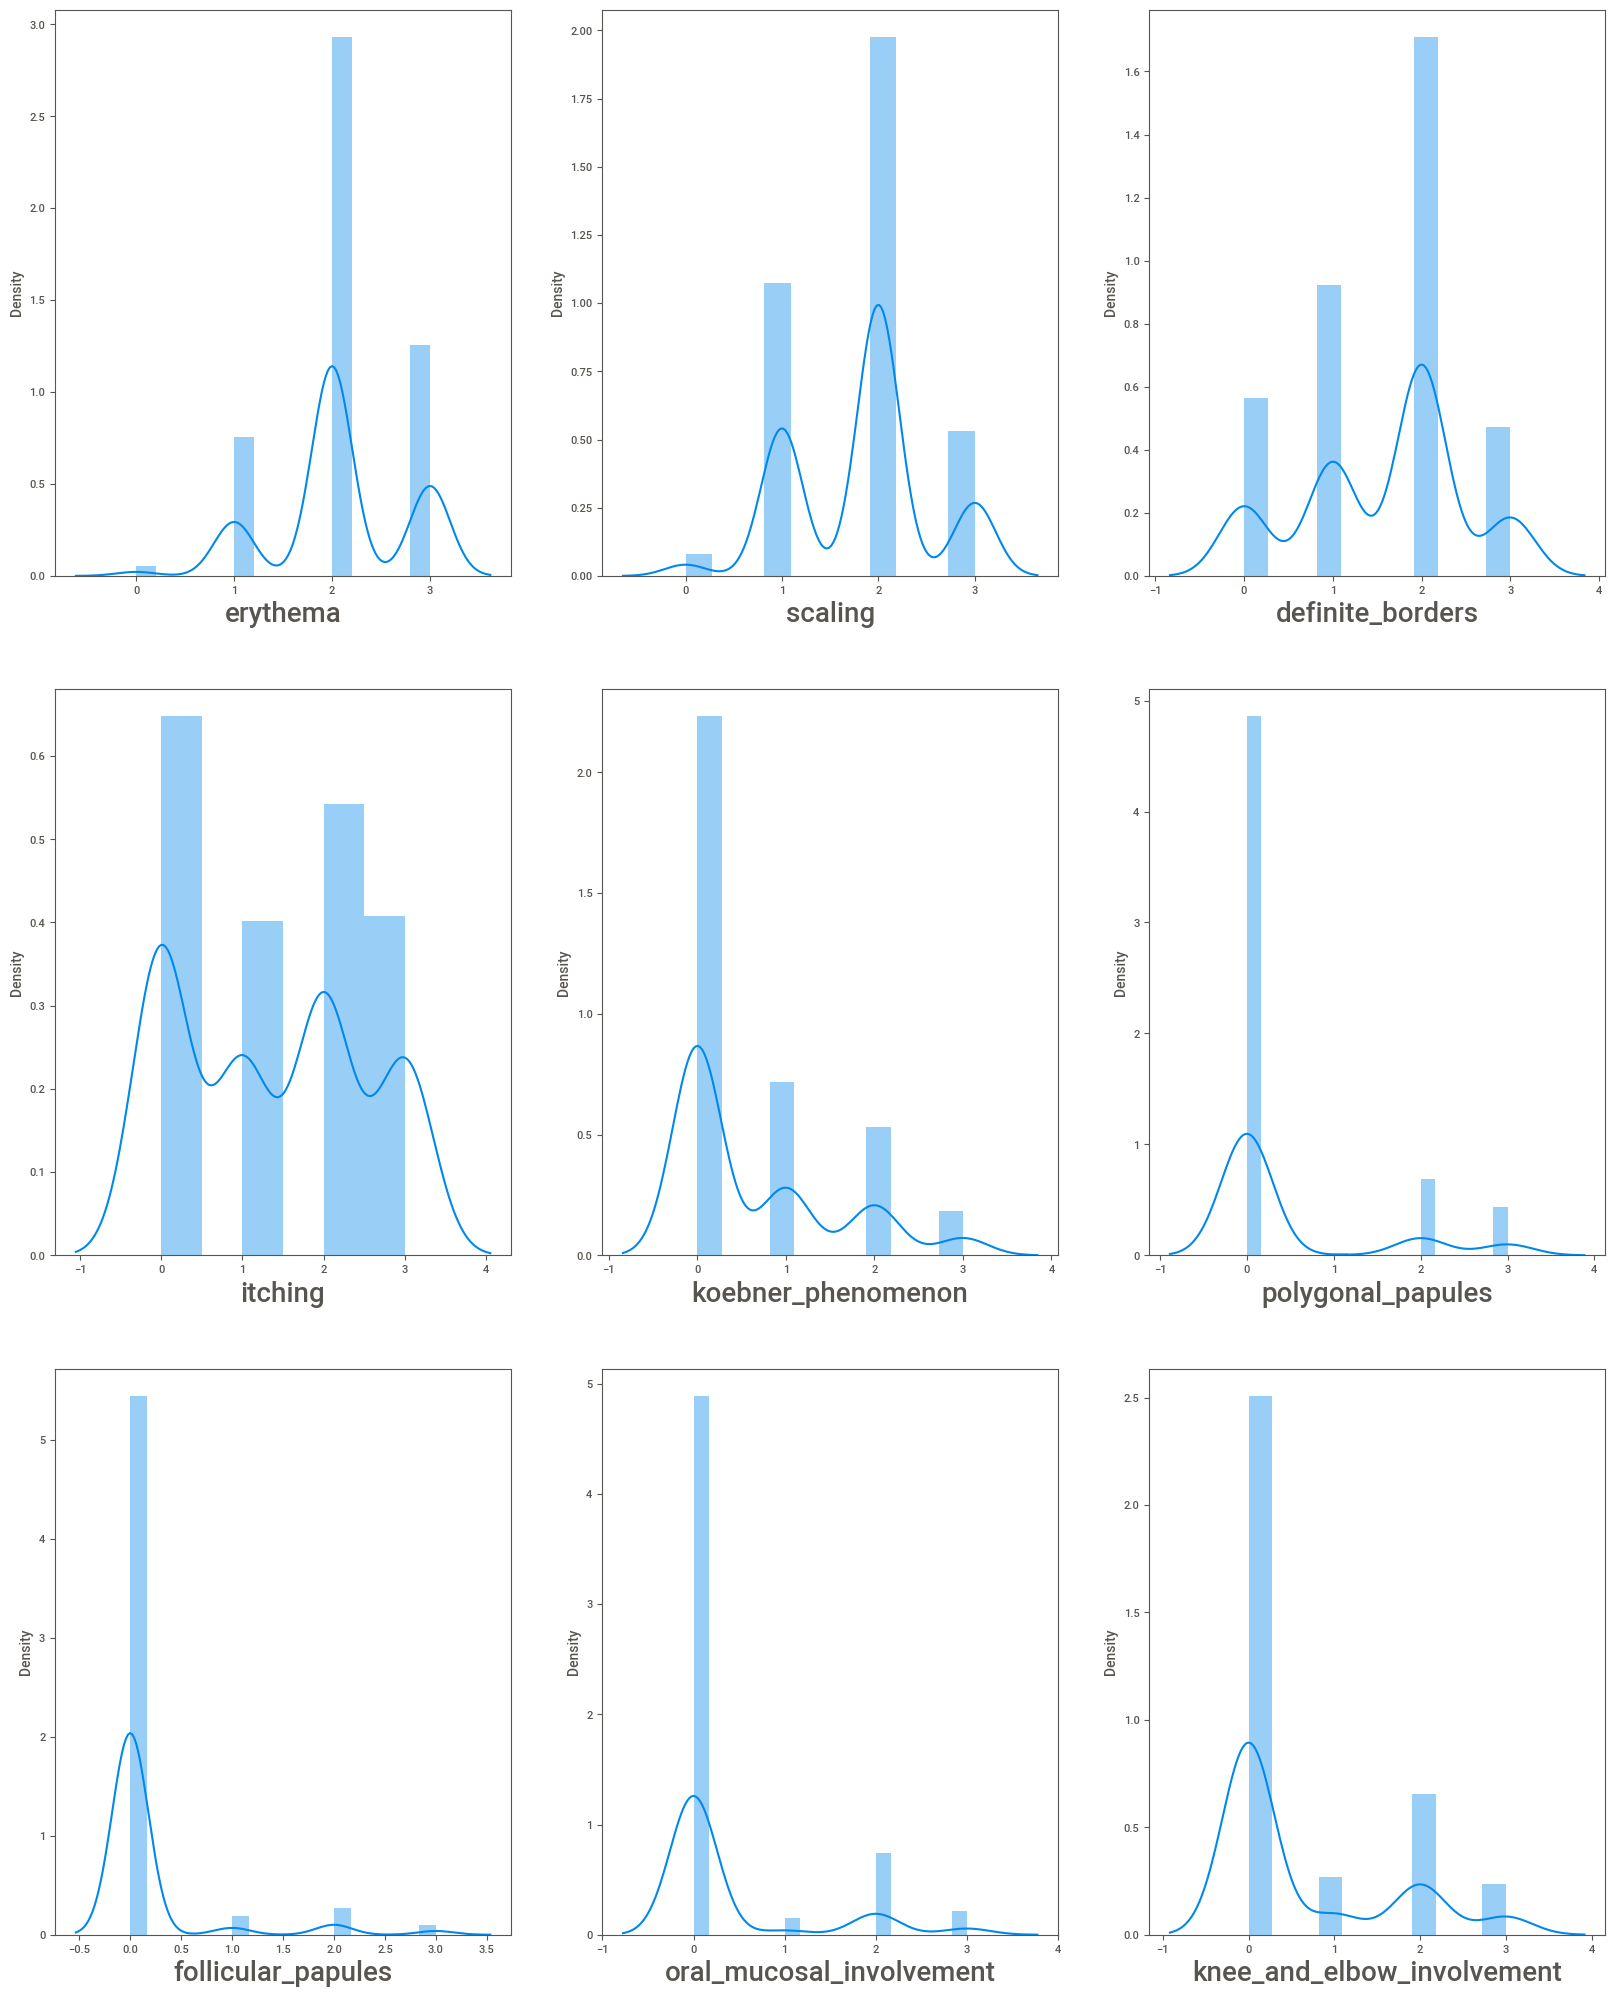

In [21]:
# let's see how data is distributed for every column 
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Positive Skewness: If a distribution is skewed to the right (tail on the right), it means that the majority of the values are concentrated on the left side, and there are few larger values on the right side.
Negative Skewness: If a distribution is skewed to the left (tail on the left), it means that the majority of the values are concentrated on the right side, and there are few smaller values on the left side.
Identify columns with multiple peaks, indicating a multimodal distribution. This might suggest the presence of subgroups within the data.
Assess the range of values in each column. Extremely large or small values might need special attention or transformation.

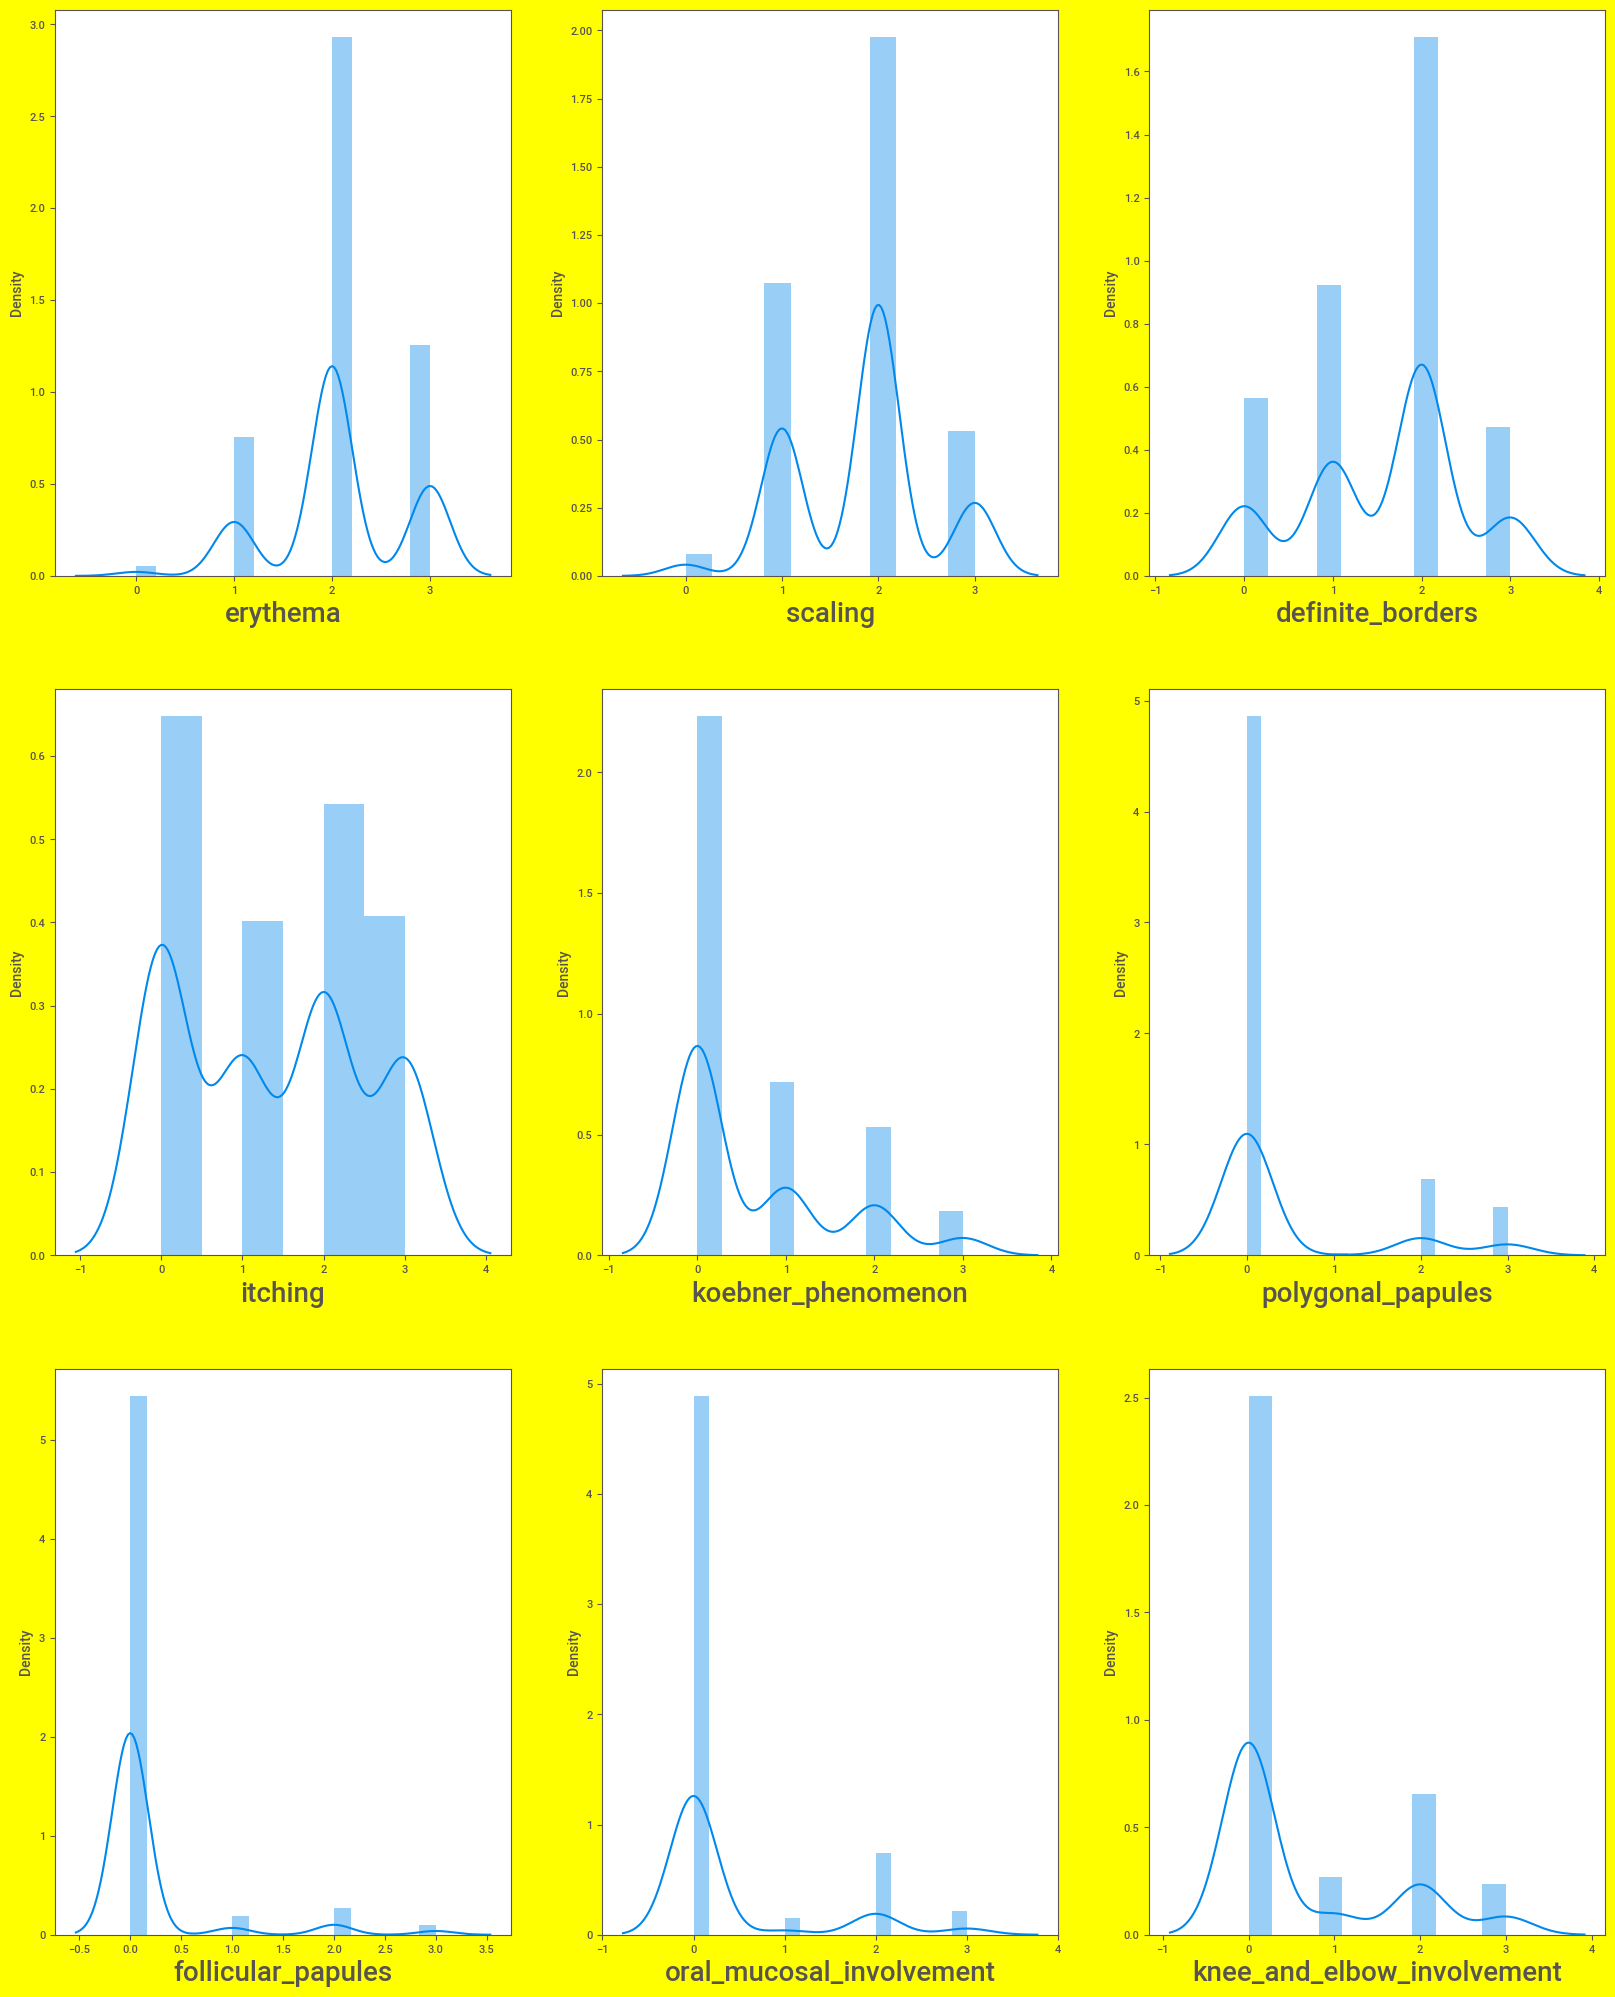

In [22]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1
for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Data Preprocesing

In [23]:
data.isnull().sum()   ##checking null values/missing values

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

Data Cleaning
No Missing Values in the Dataset and performing visualizations to gain insights of dataset

In [24]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [25]:
data.duplicated().sum()

0

In [26]:
data_box=data[['erythema', 'scaling','itching','scaling','polygonal_papules','follicular_papules','oral_mucosal_involvement','knee_and_elbow_involvement' ]] 

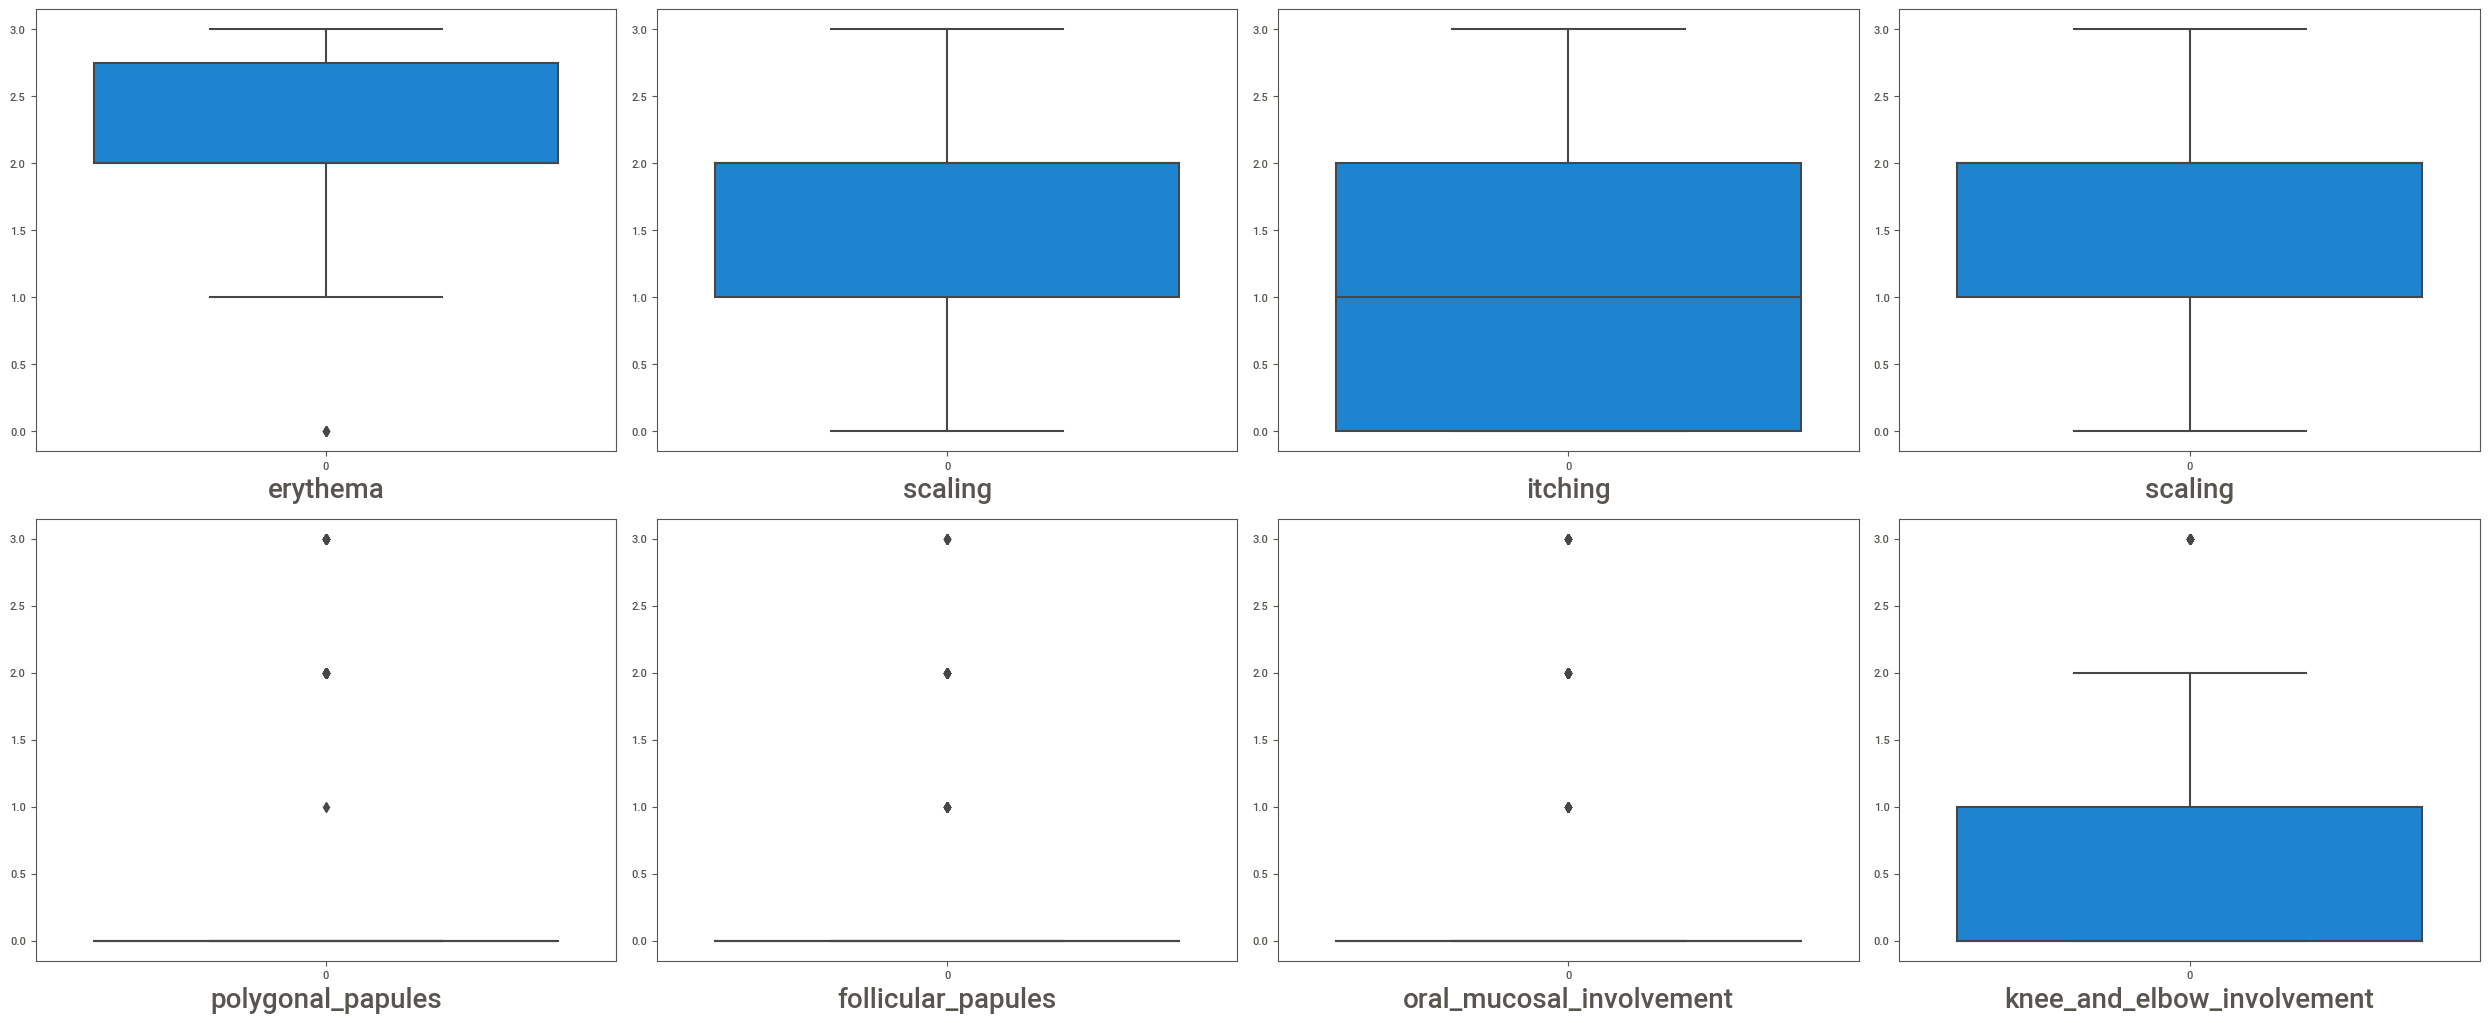

In [27]:
plt.figure(figsize=(25,20),facecolor='white')   ## Outliers
plotnumber=1
for column in data_box:
    if plotnumber<=16 :
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()   

## Feature Selection

The bar plot is useful for visualizing the frequency or count of different categories in a categorical variable, such as the 'class' column in our DataFrame. By plotting a bar plot, we can compare the number of instances for each class and gain insights into the class distribution. This visualization can reveal class imbalances, identify dominant or minority classes, or provide an overview of the distribution of the target variable.

In [28]:
# Calculate the correlation matrix
corr_matrix = data.corr()
corr_matrix

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,...,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,...,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,...,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,...,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,...,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,...,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,...,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,...,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,...,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,...,0.485260,-0.257697,-0.425421,-0.262429,-0.055091,-0.020456,0.027887,-0.255333,0.036412,-0.534716


Text(0.5, 1.0, 'Correlation Matrix')

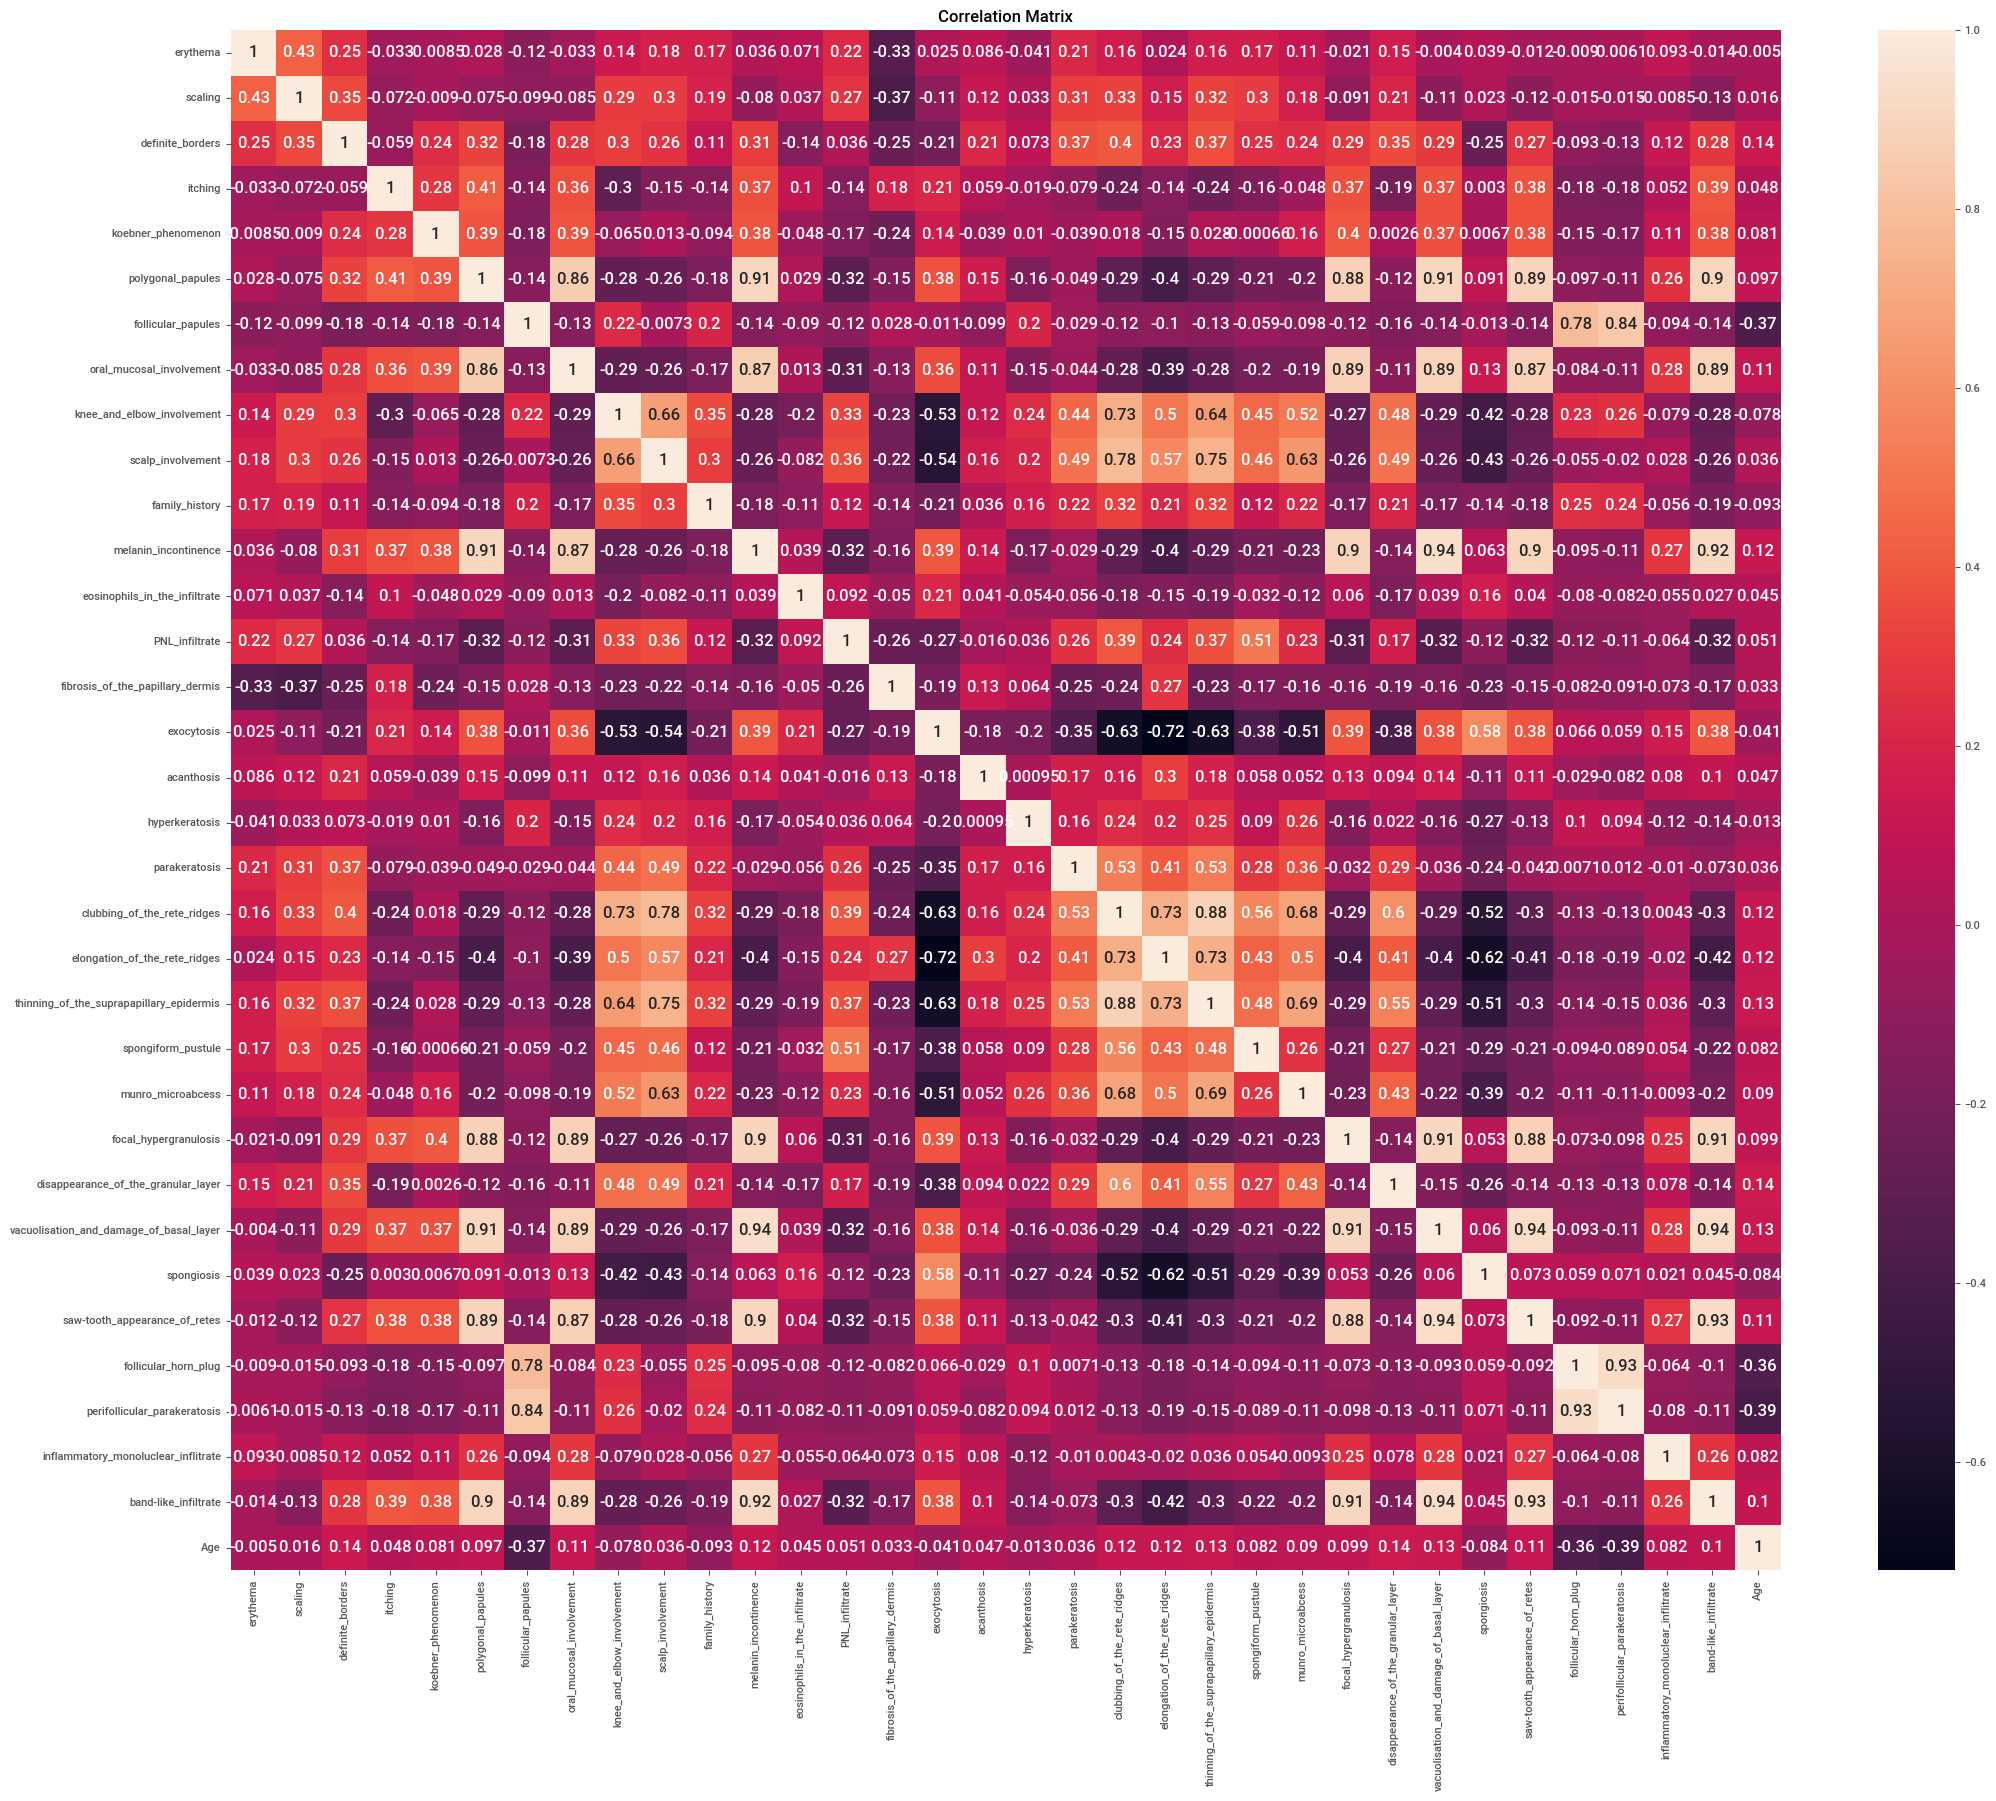

In [29]:
# Explore correlations between features
plt.figure(figsize=(25,20),facecolor='white')
sns.heatmap(data.drop('class',axis=1).corr(),annot=True,annot_kws={'size': 12})
plt.title('Correlation Matrix')

## Model Creation

This section focuses on preparing the data for machine learning modeling. It involves various preprocessing steps such as feature scaling, encoding categorical variables, and splitting the data into training and testing sets. Properly preparing the data ensures it is in a suitable format for training and evaluating machine learning models.

In [30]:
from sklearn.metrics import f1_score        
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [31]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [32]:
le = LabelEncoder()   ## Encoding 
y = le.fit_transform(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(286, 34)
(286,)
(72, 34)
(72,)


In [35]:
# Define a dictionary to store the results
results = {}

An ensemble method that combines multiple decision trees by aggregating their predictions. It's a powerful and robust method that works well for high-dimensional problems and can handle non-linear relationships between the features and the target class.

In [36]:
%%time
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: total: 141 ms
Wall time: 355 ms


In [37]:
%%time
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

CPU times: total: 0 ns
Wall time: 25.6 ms


we compare the results and performance of different machine learning models. We analyze the accuracy and other relevant metrics to determine the most effective model for predicting erythemato-squamous. This comparison helps us choose the model that provides the highest predictive accuracy and reliability.

In [38]:
# Create a DataFrame from the results
data_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time'])

In [39]:
data_results

,Accuracy,Precision,Recall,F1-Score,Training Time
Random Forest,0.972222,0.972222,0.972222,0.972222,0.340581
Decision Trees,0.916667,0.926759,0.916667,0.913066,0.007959


In [40]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.67      0.80        15
           2       0.93      1.00      0.97        14
           3       0.75      0.90      0.82        10
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         3

    accuracy                           0.92        72
   macro avg       0.93      0.93      0.92        72
weighted avg       0.93      0.92      0.91        72



In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
 #Define class labels
classes = ['0', '1', '2', '3', '4', '5']

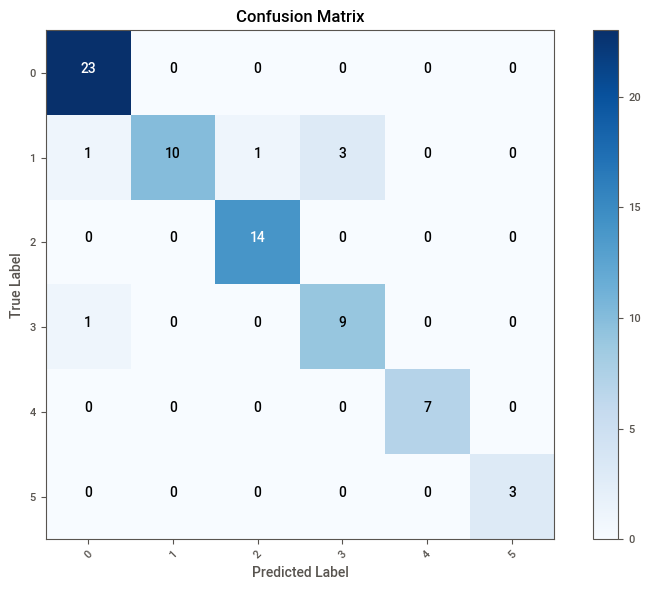

In [43]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Model Comparison

1) In Random Forest Accuracy Score is 95.8 %.
2) In Decision Trees Accuracy Score is 94.4 %.

In conclusion, both Decision Trees and Random Forests can be used for skin disorder prediction. Random Forests are generally more accurate and robust, but Decision Trees can be simpler and easier to interpret. The choice between the two depends on the specific requirements of the project.therefore in conclusion random forest provides the best possible result of 95.4%.

# Challenges Faced

1) Data Quality: The success of a prediction model largely depends on the quality of the data used. Incomplete, inconsistent, or noisy data can significantly impact the performance of the model.

2) Feature Selection: Identifying the most relevant features for predicting skin disorders can be challenging. Irrelevant or redundant features can lead to overfitting and poor model performance.

3) Imbalanced Data: Medical datasets often suffer from class imbalance, where the number of instances of one class (e.g., patients with a skin disorder) is much smaller than the other class (e.g., healthy patients). This can lead to models that are biased towards the majority class.

4) Interpretability: Machine learning models can be complex and difficult to interpret2. This is particularly important in healthcare, where understanding the reasoning behind a prediction can be as important as the prediction itself.

5) Privacy and Ethical Considerations: Medical data is sensitive, and using it for prediction requires careful consideration of privacy and ethical issues.

6) Computational Resources: Machine learning algorithms can be computationally intensive, particularly with large datasets. This can be a challenge if computational resources are limited